<a href="https://colab.research.google.com/github/Megeeee/Machine-Learning/blob/main/ValidationErrorVsTrainError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchinfo
!pip install idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torchinfo import summary
import torch.optim as optim

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=fe9929111f93f475e5af7428241a1c14562f092b9e2a651edeb44884b21e14e7
  Stored in directory: /root/.cache/pip/wheels/f7/48/00/ae031c97d62f39e1c3c4daa00426c09a65eb29ae5753a189ee
Successfully built idx2numpy


In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hojjatk/mnist-dataset
!unzip mnist-dataset.zip -d mnist_data

In [3]:
import idx2numpy
import numpy as np

train_image_array = idx2numpy.convert_from_file('/content/mnist_data/train-images.idx3-ubyte')
train_label_array = idx2numpy.convert_from_file('/content/mnist_data/train-labels.idx1-ubyte')

test_image_array = idx2numpy.convert_from_file('/content/mnist_data/t10k-images.idx3-ubyte')
test_label_array = idx2numpy.convert_from_file('/content/mnist_data/t10k-labels.idx1-ubyte')

print(train_image_array.shape)
print(train_label_array.shape)
print("\n")
print(test_image_array.shape)
print(test_label_array.shape)

(60000, 28, 28)
(60000,)


(10000, 28, 28)
(10000,)


In [4]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
class MNISTDataset(Dataset):
  def __init__(self,imagearray,labelarray,transform=None):
    self.imagearray = imagearray
    self.labelarray = labelarray
    self.transform = transform

  def __len__(self):
    return len(self.imagearray)

  def __getitem__(self,idx):
    return self.transform(self.imagearray[idx]),torch.tensor(self.labelarray[idx],dtype=torch.long)


In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,)),
    transforms.RandomRotation(degrees=15)
])

trainDataset = MNISTDataset(train_image_array,train_label_array,transform)
testDataset = MNISTDataset(test_image_array,test_label_array,transform)

trainLoader = DataLoader(trainDataset,batch_size=64,shuffle=True)
testLoader = DataLoader(testDataset,batch_size=64,shuffle = False)

In [6]:
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        #input 28x28
        nn.Conv2d(1,32,3,stride = 1,padding = 1), #32x28x28
        nn.ReLU(),
        nn.MaxPool2d(2,2), #32x14x14
        nn.Conv2d(32,64,3,stride = 1,padding = 1), #64x14x14
        nn.ReLU(),
        nn.MaxPool2d(2,2), #64x7x7
        nn.Flatten(),
        nn.Linear(64*7*7,128),
        nn.ReLU(),
        nn.Linear(128,10),
    )

  def forward(self,x):
    return self.model(x)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=CNNModel().to(device)
summary(model,input_size=(1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Conv2d: 2-1                       [1, 32, 28, 28]           320
│    └─ReLU: 2-2                         [1, 32, 28, 28]           --
│    └─MaxPool2d: 2-3                    [1, 32, 14, 14]           --
│    └─Conv2d: 2-4                       [1, 64, 14, 14]           18,496
│    └─ReLU: 2-5                         [1, 64, 14, 14]           --
│    └─MaxPool2d: 2-6                    [1, 64, 7, 7]             --
│    └─Flatten: 2-7                      [1, 3136]                 --
│    └─Linear: 2-8                       [1, 128]                  401,536
│    └─ReLU: 2-9                         [1, 128]                  --
│    └─Linear: 2-10                      [1, 10]                   1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0


In [8]:
lr = 0.001
epochs = 100

optimizer = optim.Adam(model.parameters(),lr=lr)
loss = nn.CrossEntropyLoss()

/usr/local/lib/python3.12/dist-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:213.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Epoch: 1/100 TrainLoss: 0.15740902727590933 ValidationLoss:0.044535901297457 Best Loss: 0.044535901297457


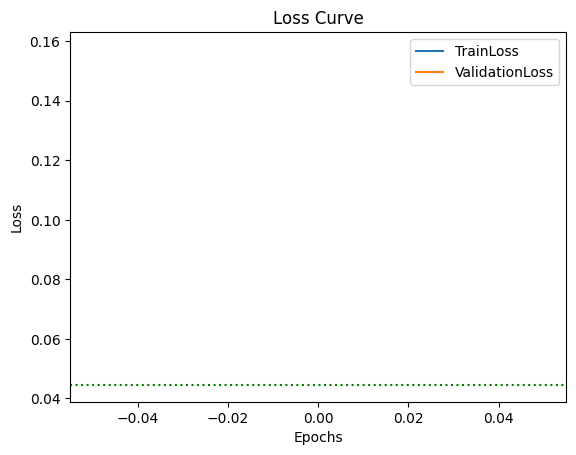

Epoch: 2/100 TrainLoss: 0.044804677022060056 ValidationLoss:0.031557406009538956 Best Loss: 0.031557406009538956


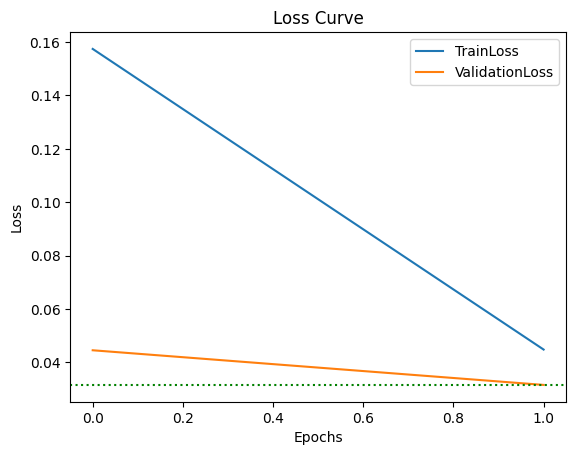

Epoch: 3/100 TrainLoss: 0.031106204684814568 ValidationLoss:0.03333107841111776 Best Loss: 0.031557406009538956


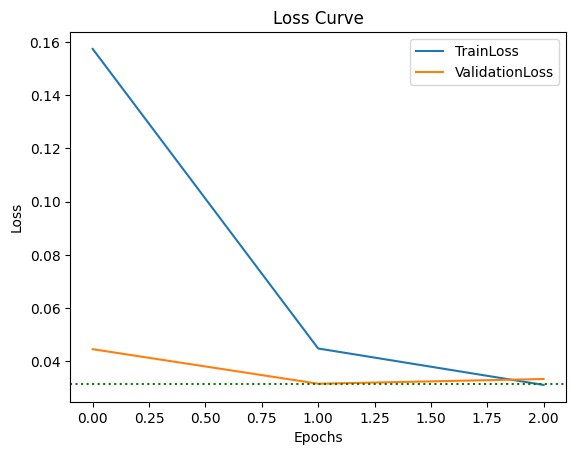

Epoch: 4/100 TrainLoss: 0.02309379288803231 ValidationLoss:0.039899751309963136 Best Loss: 0.031557406009538956


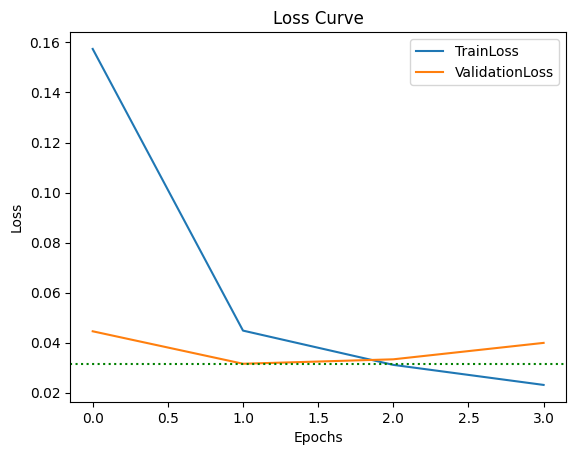

Epoch: 5/100 TrainLoss: 0.017691273052494034 ValidationLoss:0.023452804585666027 Best Loss: 0.023452804585666027


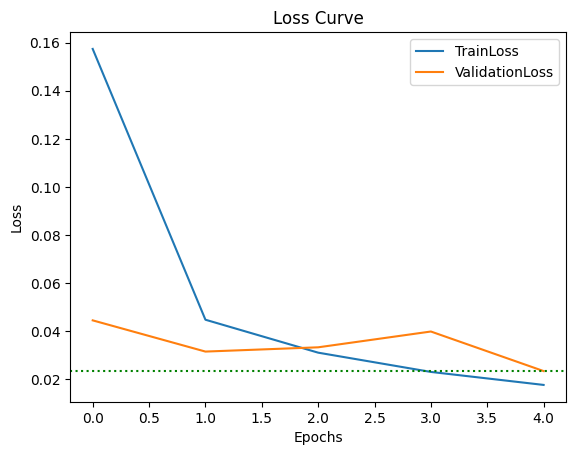

Epoch: 6/100 TrainLoss: 0.014548577451843738 ValidationLoss:0.03195056925905638 Best Loss: 0.023452804585666027


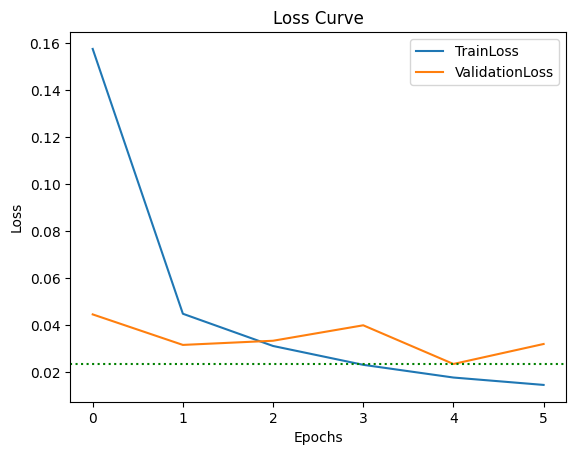

Epoch: 7/100 TrainLoss: 0.011712252225347903 ValidationLoss:0.02811604961783768 Best Loss: 0.023452804585666027


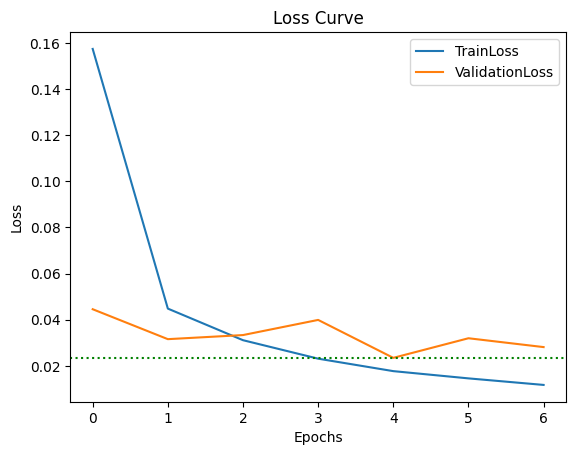

Epoch: 8/100 TrainLoss: 0.009193493391493477 ValidationLoss:0.03698356098276586 Best Loss: 0.023452804585666027


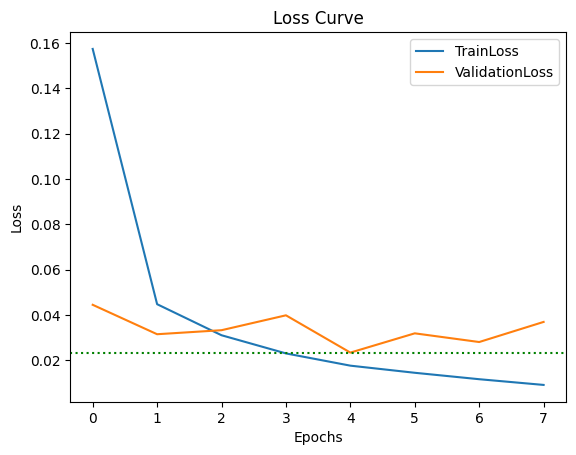

Epoch: 9/100 TrainLoss: 0.00879034956261297 ValidationLoss:0.02875448783761298 Best Loss: 0.023452804585666027


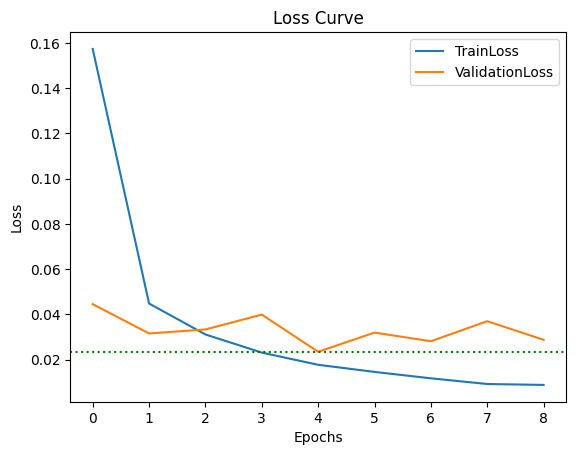

Epoch: 10/100 TrainLoss: 0.005700929492194434 ValidationLoss:0.03444450952713649 Best Loss: 0.023452804585666027


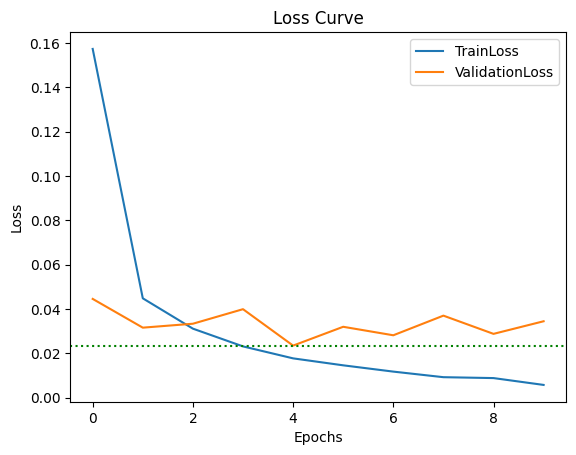

Epoch: 11/100 TrainLoss: 0.00781393803832656 ValidationLoss:0.02974823722482937 Best Loss: 0.023452804585666027


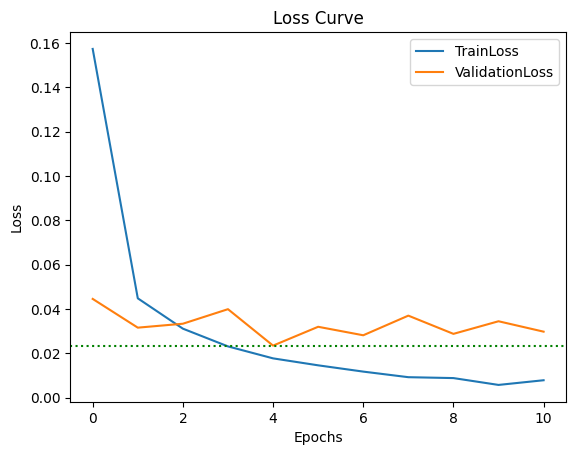

Epoch: 12/100 TrainLoss: 0.005788591796402898 ValidationLoss:0.032493736888676385 Best Loss: 0.023452804585666027


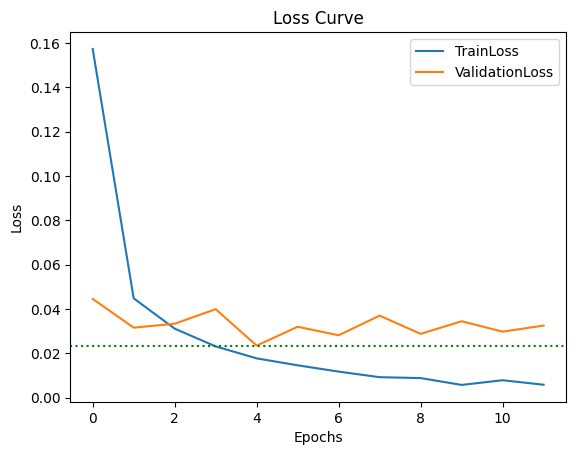

Epoch: 13/100 TrainLoss: 0.00647435887294968 ValidationLoss:0.034025139917559295 Best Loss: 0.023452804585666027


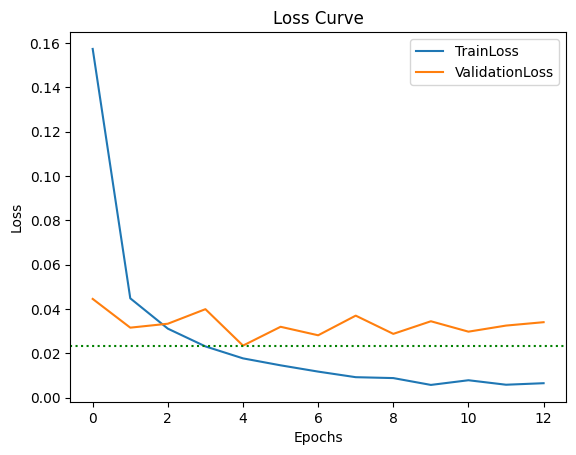

Epoch: 14/100 TrainLoss: 0.004746670681824155 ValidationLoss:0.03461033143557193 Best Loss: 0.023452804585666027


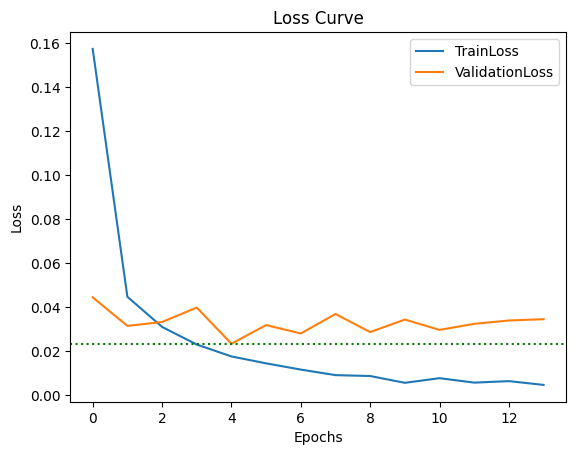

Epoch: 15/100 TrainLoss: 0.003253225740106664 ValidationLoss:0.04534966373724001 Best Loss: 0.023452804585666027


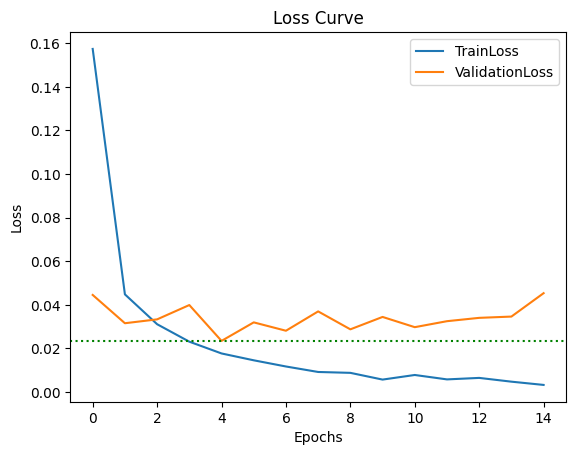

Epoch: 16/100 TrainLoss: 0.00646285147342654 ValidationLoss:0.03817151329075173 Best Loss: 0.023452804585666027


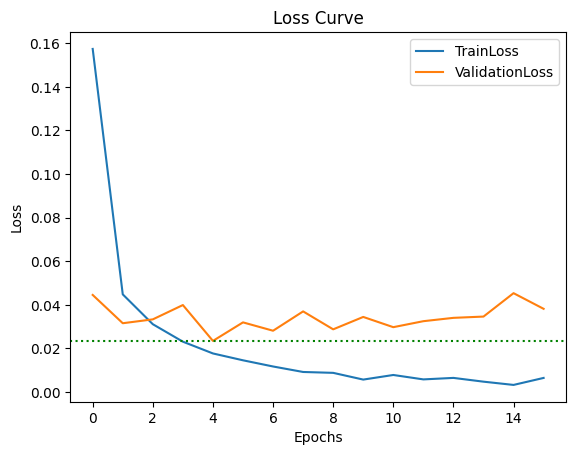

Epoch: 17/100 TrainLoss: 0.003588336793620877 ValidationLoss:0.048310226892172466 Best Loss: 0.023452804585666027


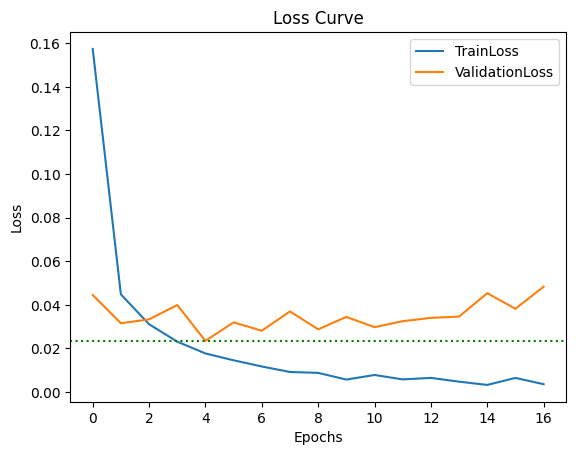

Epoch: 18/100 TrainLoss: 0.004080894242401097 ValidationLoss:0.03997744188997689 Best Loss: 0.023452804585666027


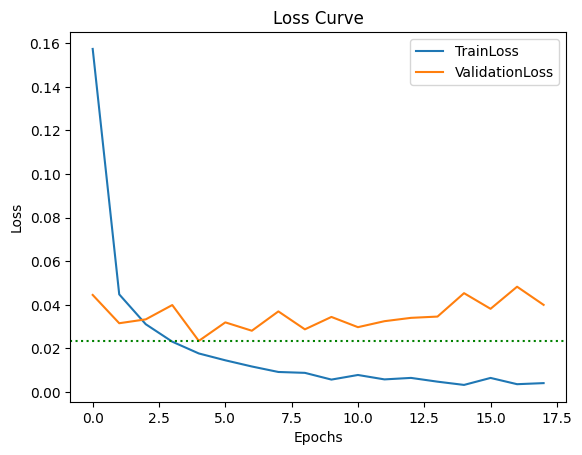

Epoch: 19/100 TrainLoss: 0.0036626413679878285 ValidationLoss:0.05043503799157242 Best Loss: 0.023452804585666027


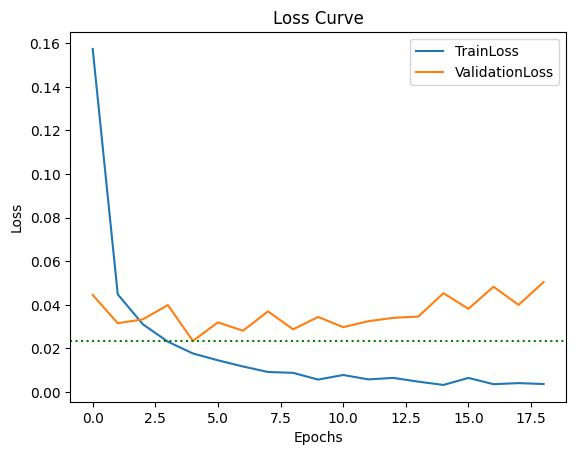

Epoch: 20/100 TrainLoss: 0.0039024510898468708 ValidationLoss:0.036873882731694216 Best Loss: 0.023452804585666027


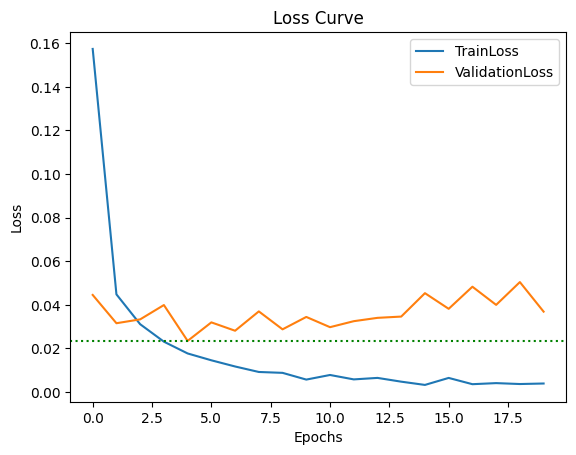

Epoch: 21/100 TrainLoss: 0.002805276635188274 ValidationLoss:0.047210722261853064 Best Loss: 0.023452804585666027


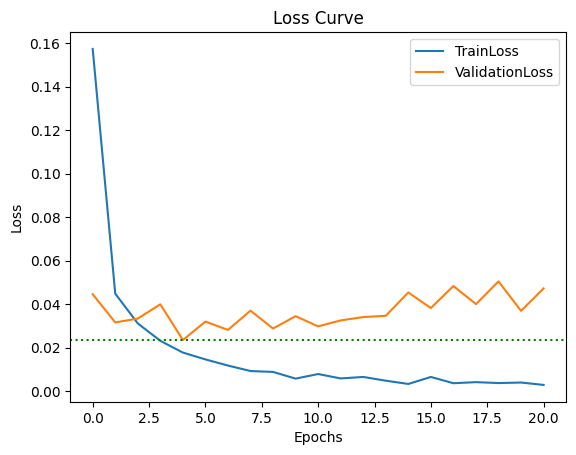

Epoch: 22/100 TrainLoss: 0.003936969603352421 ValidationLoss:0.04016073769607394 Best Loss: 0.023452804585666027


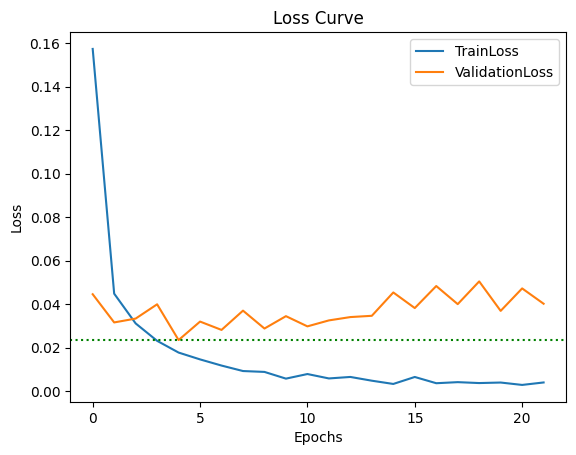

Epoch: 23/100 TrainLoss: 0.0008805775047985845 ValidationLoss:0.04539301911736244 Best Loss: 0.023452804585666027


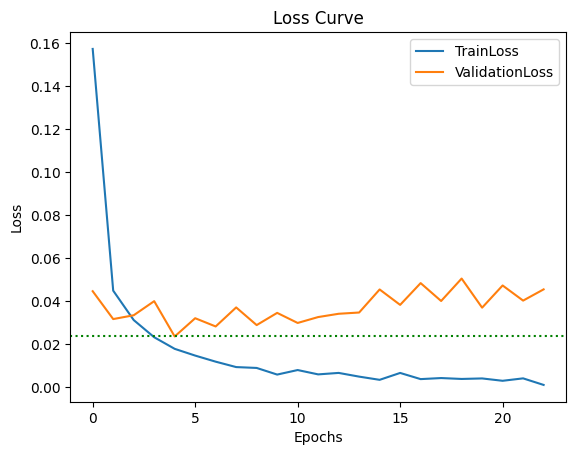

Epoch: 24/100 TrainLoss: 0.004206283745020598 ValidationLoss:0.04521344502503071 Best Loss: 0.023452804585666027


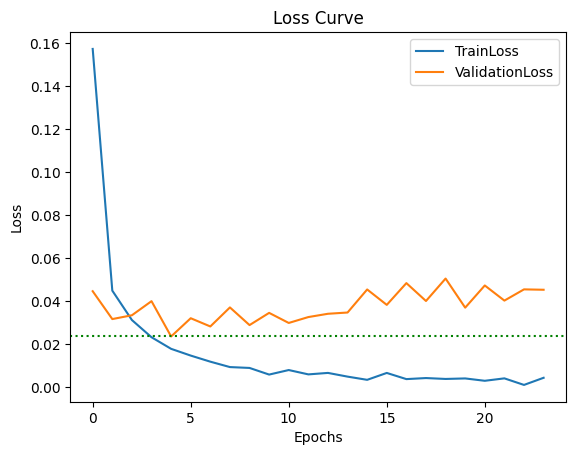

Epoch: 25/100 TrainLoss: 0.00314649831686087 ValidationLoss:0.045655019034898 Best Loss: 0.023452804585666027


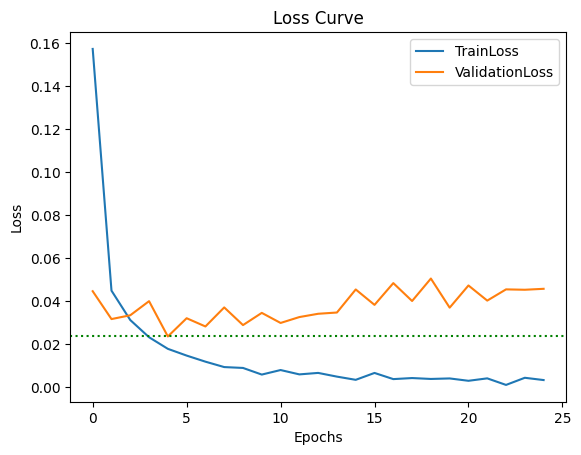

Epoch: 26/100 TrainLoss: 0.0021929608998394914 ValidationLoss:0.03656589604793764 Best Loss: 0.023452804585666027


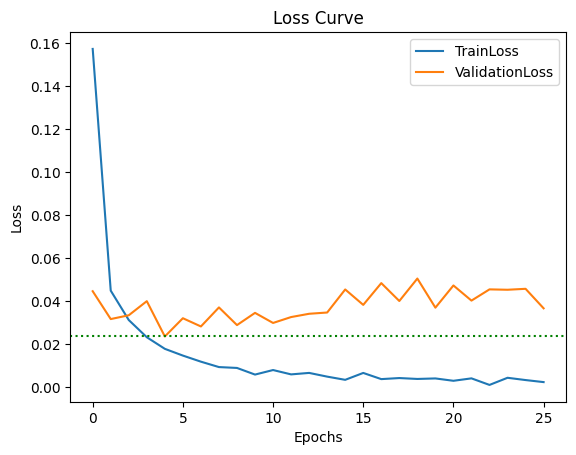

Epoch: 27/100 TrainLoss: 0.002179618630126917 ValidationLoss:0.04216266457713 Best Loss: 0.023452804585666027


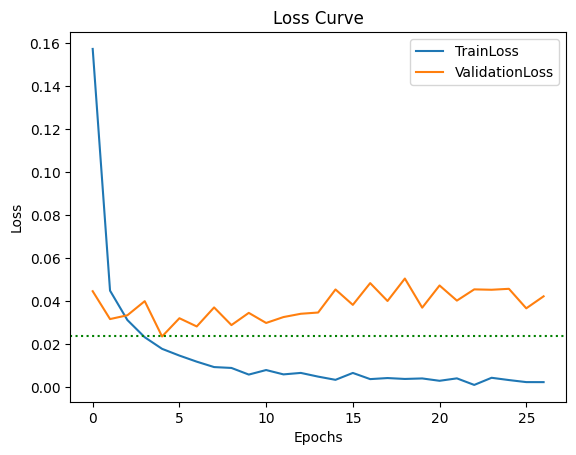

Epoch: 28/100 TrainLoss: 0.002395615091941118 ValidationLoss:0.05129409852812065 Best Loss: 0.023452804585666027


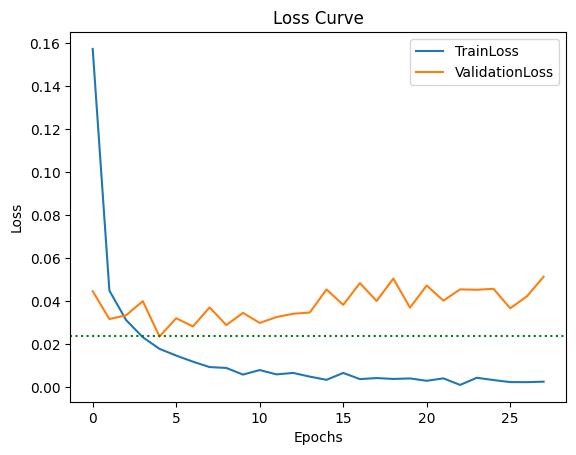

Epoch: 29/100 TrainLoss: 0.0024005701009640625 ValidationLoss:0.05811269864875585 Best Loss: 0.023452804585666027


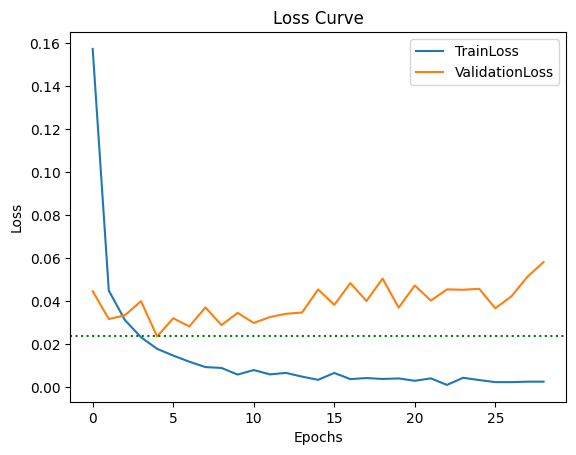

Epoch: 30/100 TrainLoss: 0.003130063909110371 ValidationLoss:0.05548603899167754 Best Loss: 0.023452804585666027


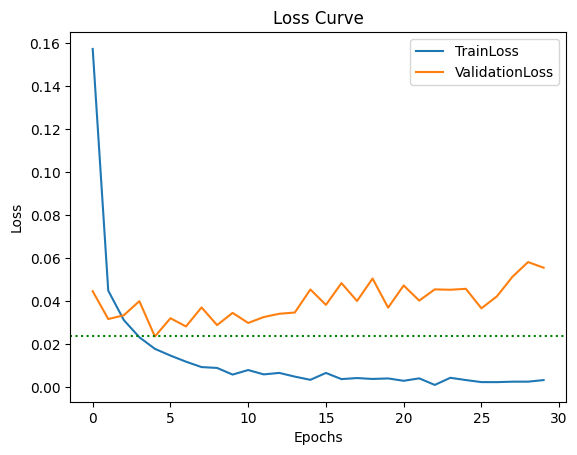

Epoch: 31/100 TrainLoss: 0.0016011894575352948 ValidationLoss:0.04673562488343613 Best Loss: 0.023452804585666027


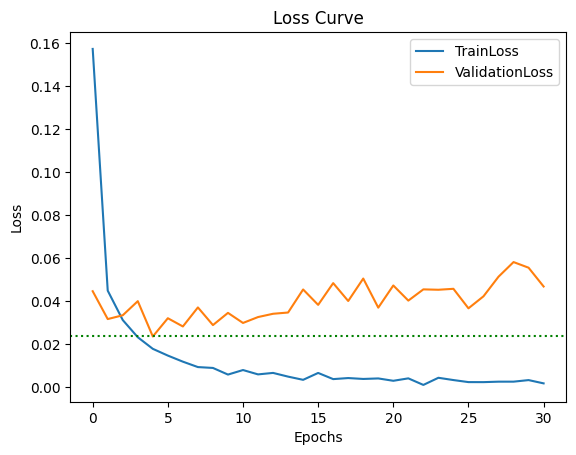

Epoch: 32/100 TrainLoss: 0.0026443502411181864 ValidationLoss:0.06722340324570326 Best Loss: 0.023452804585666027


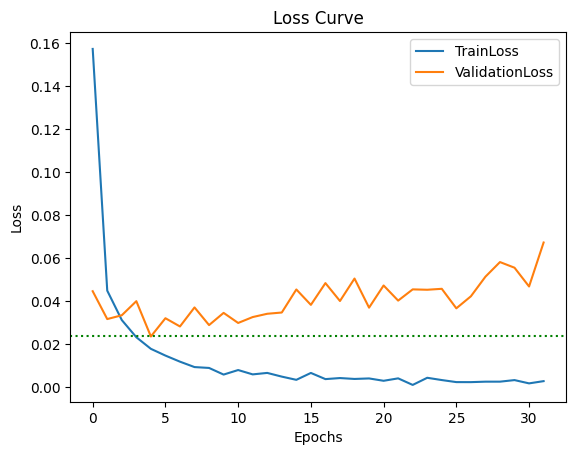

Epoch: 33/100 TrainLoss: 0.0021652139586325904 ValidationLoss:0.05796503597285584 Best Loss: 0.023452804585666027


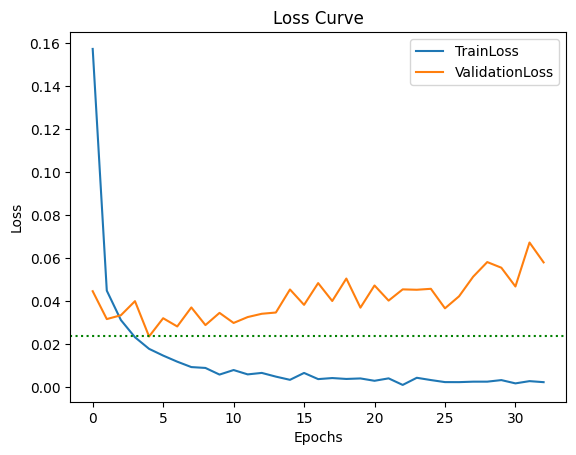

Epoch: 34/100 TrainLoss: 0.0030484748875127137 ValidationLoss:0.04585595739189576 Best Loss: 0.023452804585666027


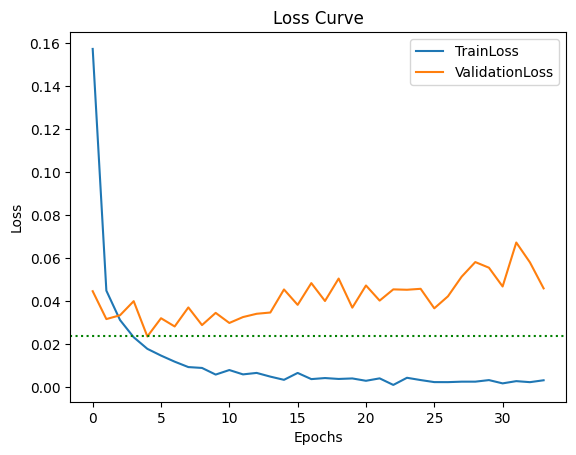

Epoch: 35/100 TrainLoss: 0.0019950128835669228 ValidationLoss:0.04854146984924776 Best Loss: 0.023452804585666027


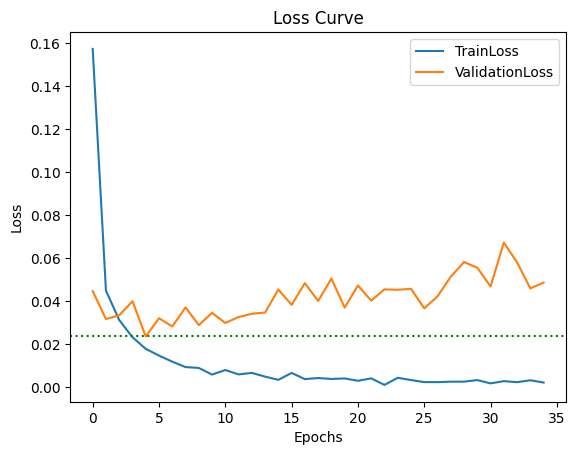

Epoch: 36/100 TrainLoss: 0.0008533788006143589 ValidationLoss:0.042690409901965314 Best Loss: 0.023452804585666027


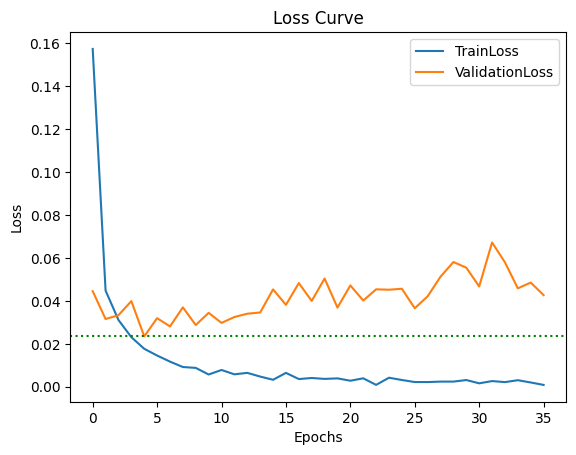

Epoch: 37/100 TrainLoss: 0.003396784444245127 ValidationLoss:0.05702553604036992 Best Loss: 0.023452804585666027


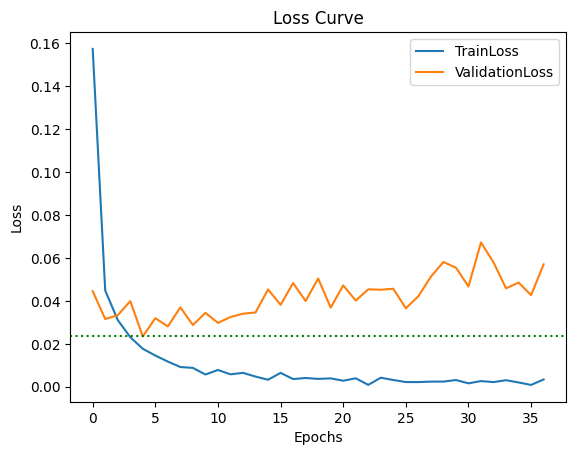

Epoch: 38/100 TrainLoss: 0.0027897630512520354 ValidationLoss:0.05342288288685121 Best Loss: 0.023452804585666027


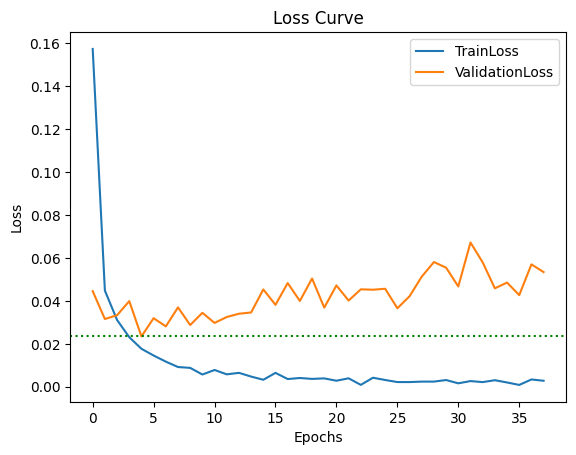

Epoch: 39/100 TrainLoss: 0.0004242458396483291 ValidationLoss:0.04365966093935391 Best Loss: 0.023452804585666027


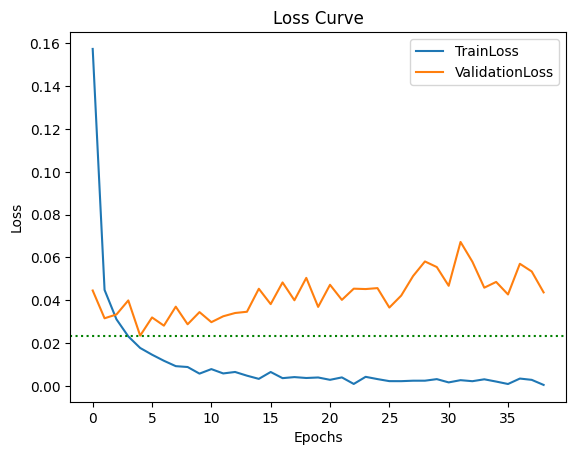

Epoch: 40/100 TrainLoss: 0.0002885668984452197 ValidationLoss:0.04752952627776801 Best Loss: 0.023452804585666027


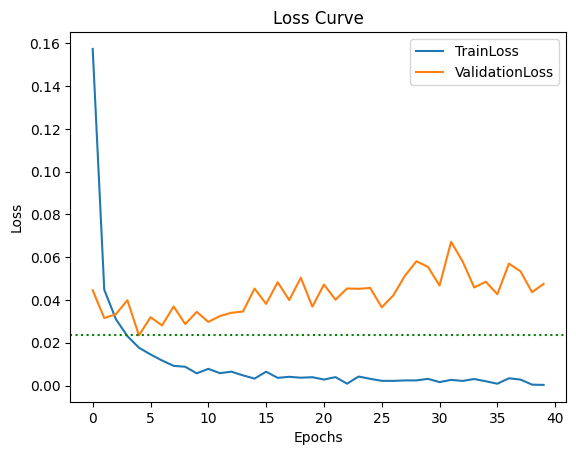

Epoch: 41/100 TrainLoss: 0.004817218972600456 ValidationLoss:0.058636094657325284 Best Loss: 0.023452804585666027


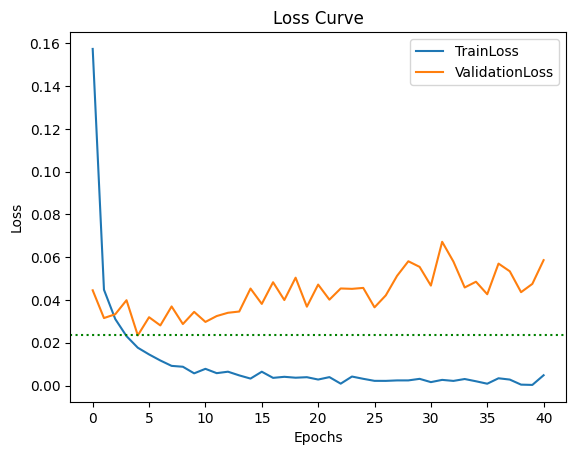

Epoch: 42/100 TrainLoss: 0.0026209277672087014 ValidationLoss:0.04874663497821411 Best Loss: 0.023452804585666027


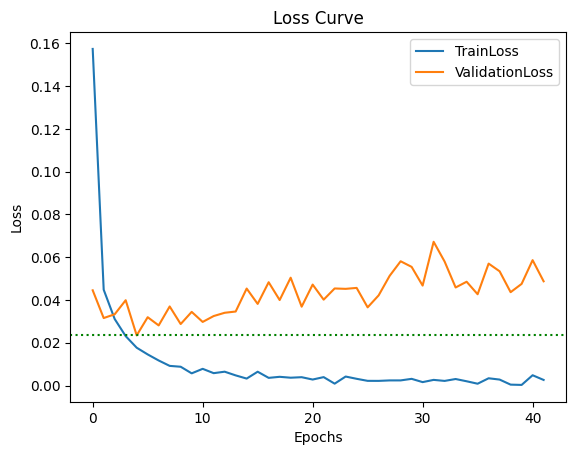

Epoch: 43/100 TrainLoss: 0.0005300695983029743 ValidationLoss:0.050927318544187736 Best Loss: 0.023452804585666027


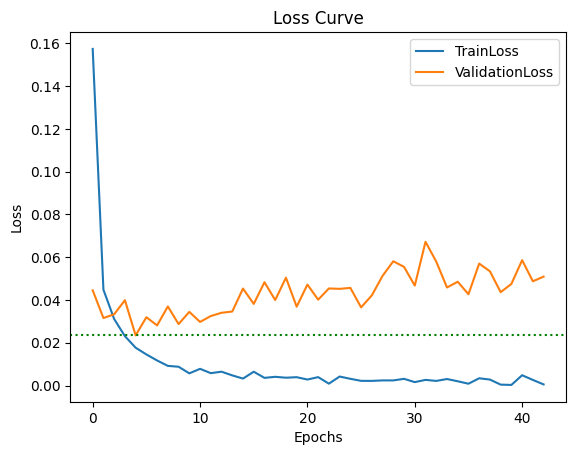

Epoch: 44/100 TrainLoss: 0.0018123611651194972 ValidationLoss:0.05897008026387781 Best Loss: 0.023452804585666027


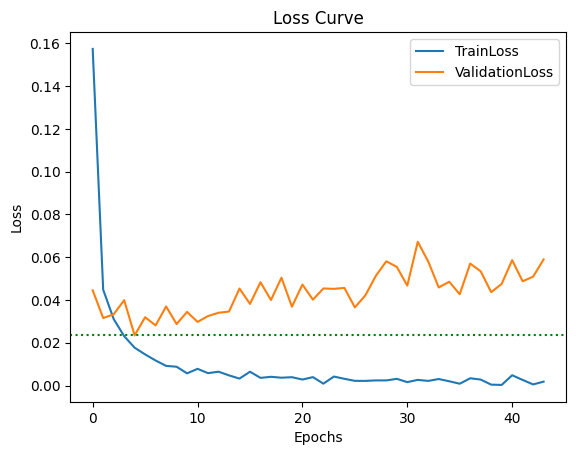

Epoch: 45/100 TrainLoss: 0.0018886998832703572 ValidationLoss:0.07514115511997835 Best Loss: 0.023452804585666027


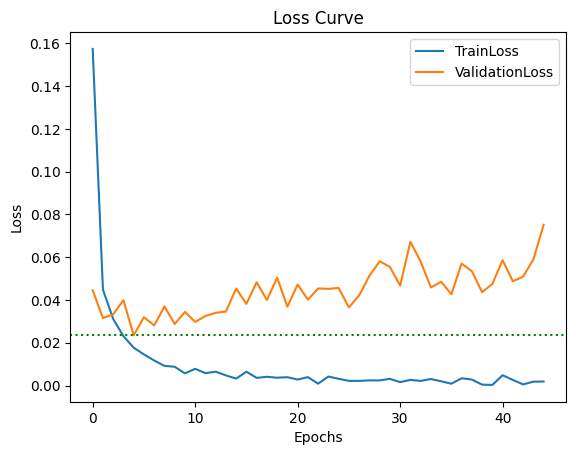

Epoch: 46/100 TrainLoss: 0.0013171383412055712 ValidationLoss:0.06113243987149119 Best Loss: 0.023452804585666027


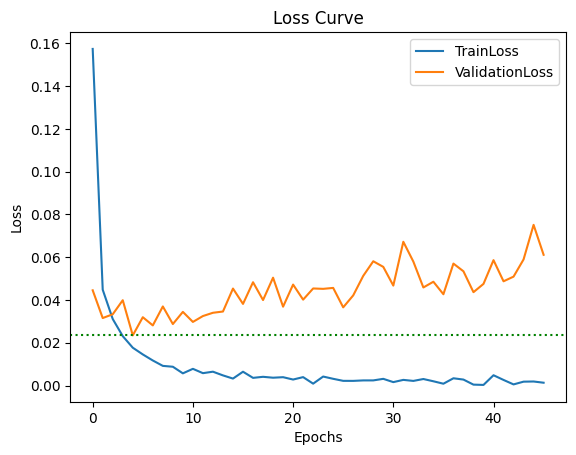

Epoch: 47/100 TrainLoss: 0.0035564428417303273 ValidationLoss:0.060425824943839405 Best Loss: 0.023452804585666027


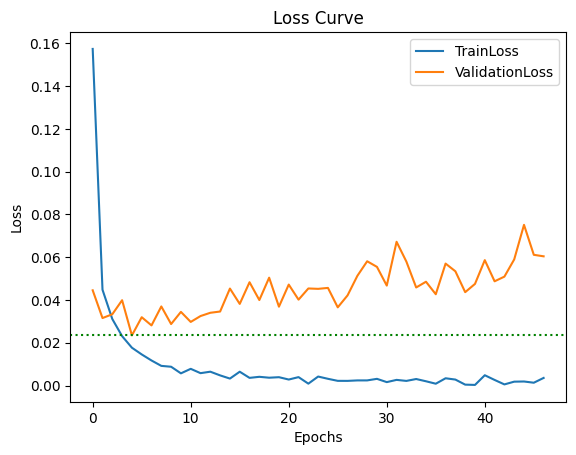

Epoch: 48/100 TrainLoss: 0.00021410425898117324 ValidationLoss:0.05615492944892597 Best Loss: 0.023452804585666027


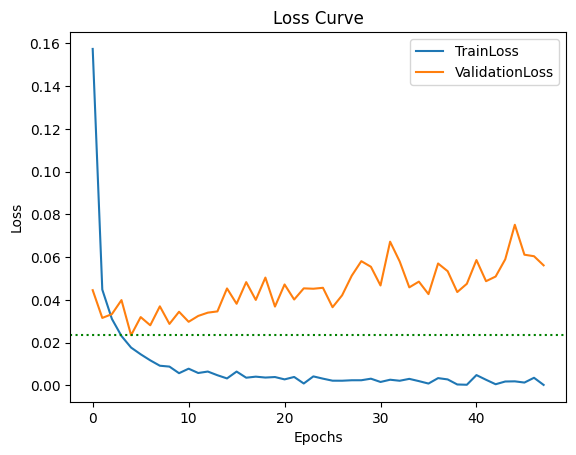

Epoch: 49/100 TrainLoss: 1.4259292762386592e-05 ValidationLoss:0.05248569993205452 Best Loss: 0.023452804585666027


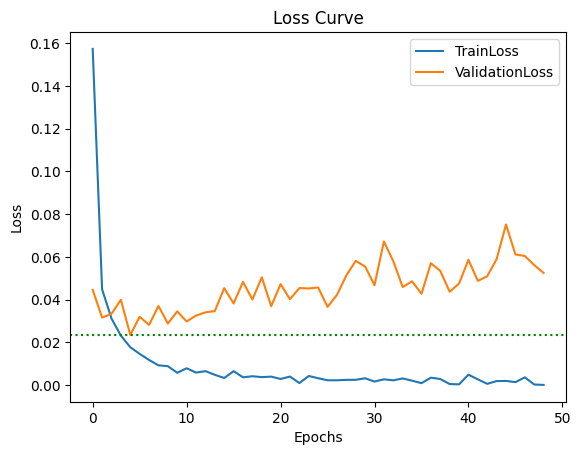

Epoch: 50/100 TrainLoss: 4.044350546658288e-06 ValidationLoss:0.05313480637869684 Best Loss: 0.023452804585666027


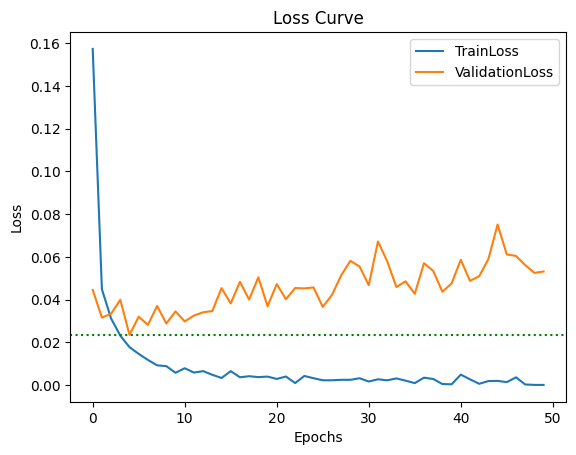

Epoch: 51/100 TrainLoss: 7.681279918404933e-07 ValidationLoss:0.053182736705336985 Best Loss: 0.023452804585666027


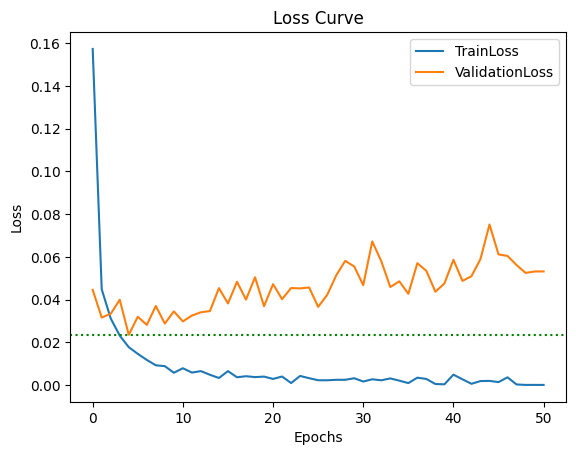

Epoch: 52/100 TrainLoss: 5.402328163500168e-07 ValidationLoss:0.05331093386361054 Best Loss: 0.023452804585666027


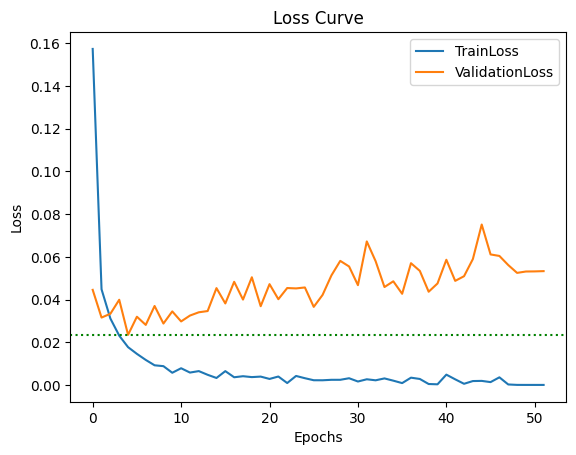

Epoch: 53/100 TrainLoss: 3.9853635423987436e-07 ValidationLoss:0.05339294566448294 Best Loss: 0.023452804585666027


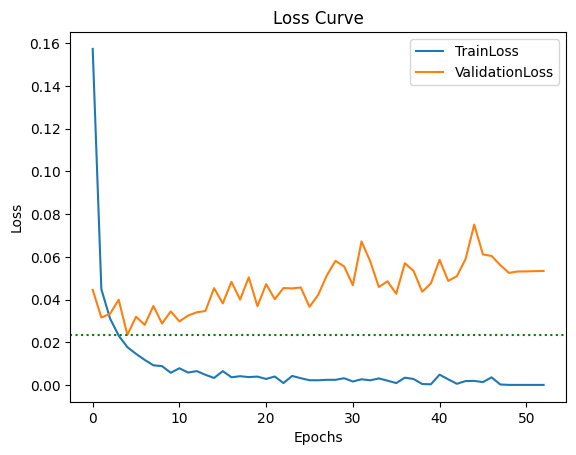

Epoch: 54/100 TrainLoss: 2.9230399055441346e-07 ValidationLoss:0.05367121602853903 Best Loss: 0.023452804585666027


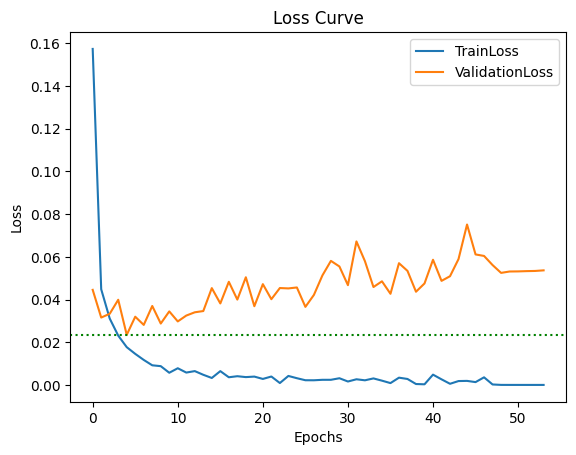

Epoch: 55/100 TrainLoss: 2.1516381620490156e-07 ValidationLoss:0.05395999986116412 Best Loss: 0.023452804585666027


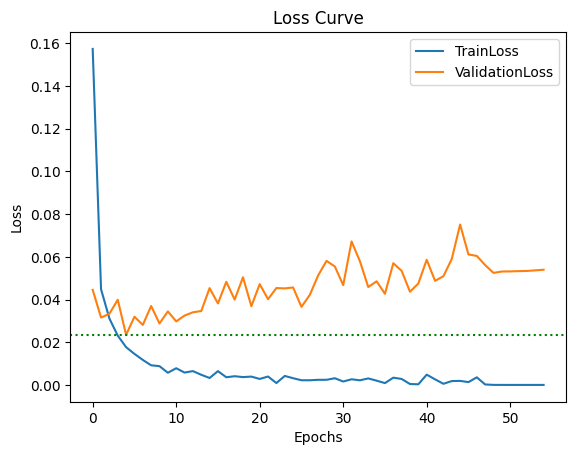

Epoch: 56/100 TrainLoss: 1.538138445547781e-07 ValidationLoss:0.054313531905594854 Best Loss: 0.023452804585666027


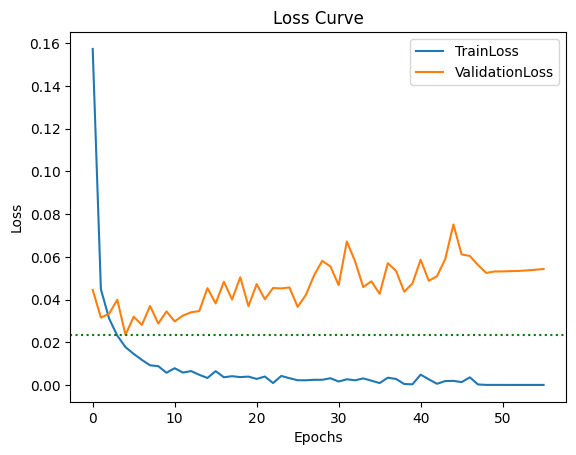

Epoch: 57/100 TrainLoss: 1.0584783213493635e-07 ValidationLoss:0.05475549863928421 Best Loss: 0.023452804585666027


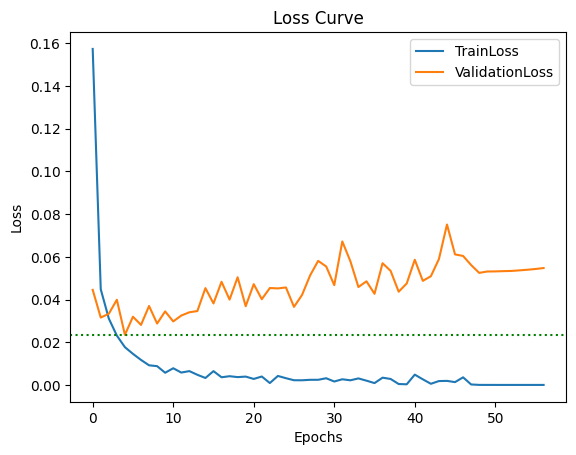

Epoch: 58/100 TrainLoss: 7.136110503177545e-08 ValidationLoss:0.05531759229139379 Best Loss: 0.023452804585666027


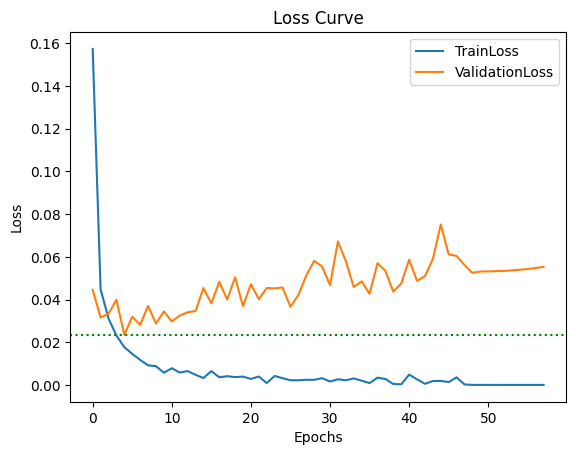

Epoch: 59/100 TrainLoss: 4.778687261770236e-08 ValidationLoss:0.055726814371648774 Best Loss: 0.023452804585666027


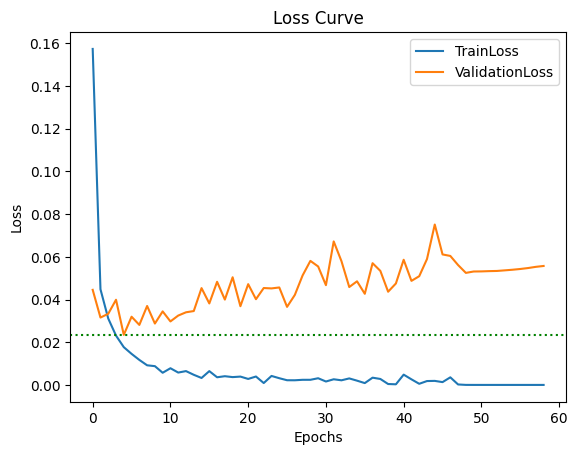

Epoch: 60/100 TrainLoss: 3.1472136472022314e-08 ValidationLoss:0.056378933349045784 Best Loss: 0.023452804585666027


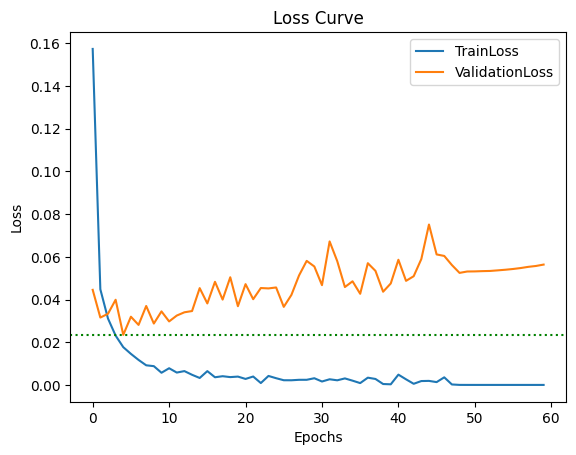

Epoch: 61/100 TrainLoss: 2.0697516336570622e-08 ValidationLoss:0.056937178343587636 Best Loss: 0.023452804585666027


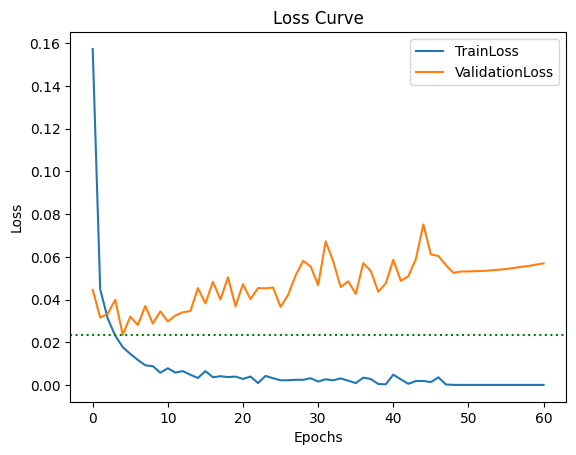

Epoch: 62/100 TrainLoss: 1.3336349060388522e-08 ValidationLoss:0.05769162003950332 Best Loss: 0.023452804585666027


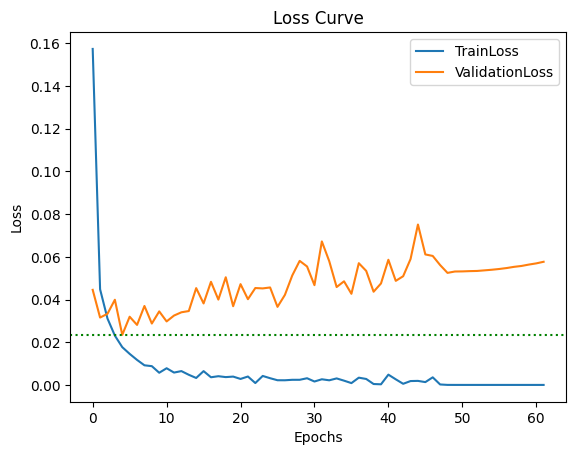

Epoch: 63/100 TrainLoss: 8.792942638749992e-09 ValidationLoss:0.058508176311075674 Best Loss: 0.023452804585666027


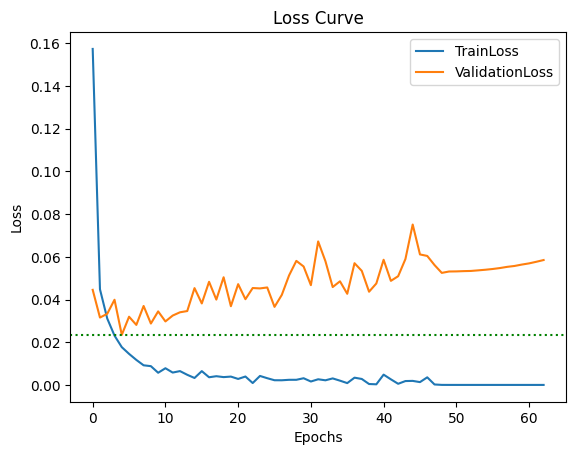

Epoch: 64/100 TrainLoss: 5.6733180652764834e-09 ValidationLoss:0.05942022167778922 Best Loss: 0.023452804585666027


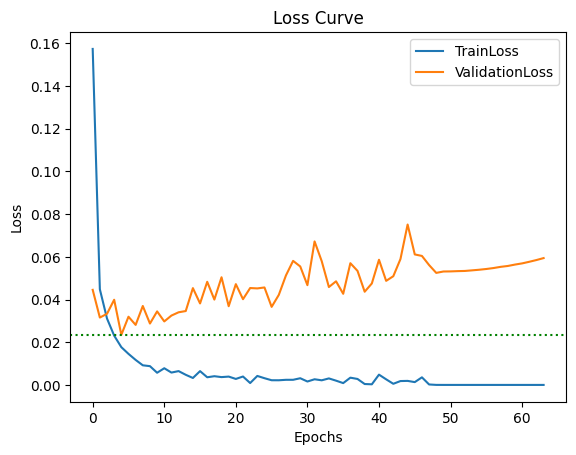

Epoch: 65/100 TrainLoss: 3.639900571900124e-09 ValidationLoss:0.06001415436007803 Best Loss: 0.023452804585666027


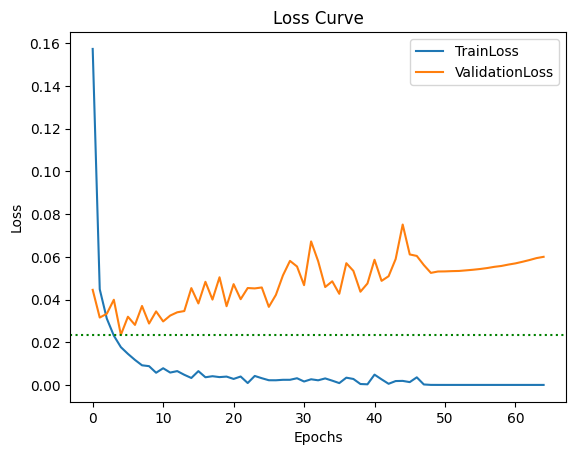

Epoch: 66/100 TrainLoss: 2.3570991574114694e-09 ValidationLoss:0.06100553233016445 Best Loss: 0.023452804585666027


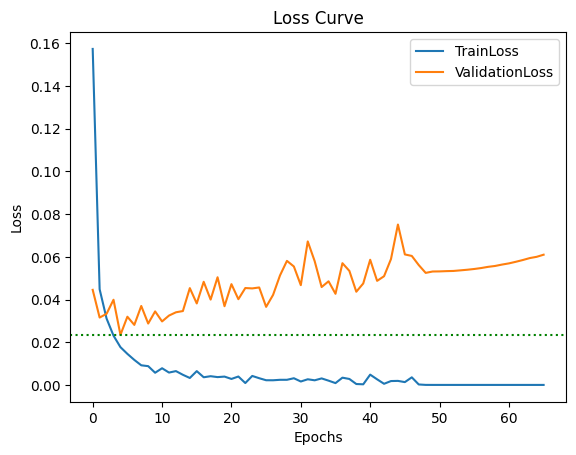

Epoch: 67/100 TrainLoss: 1.509179128386005e-09 ValidationLoss:0.061920758837402085 Best Loss: 0.023452804585666027


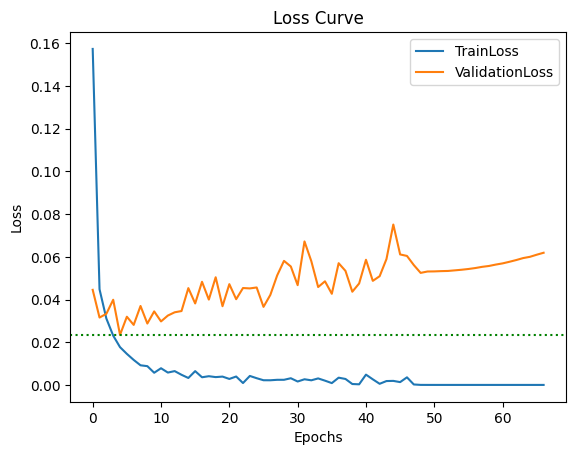

Epoch: 68/100 TrainLoss: 9.889095475929298e-10 ValidationLoss:0.06297119942902665 Best Loss: 0.023452804585666027


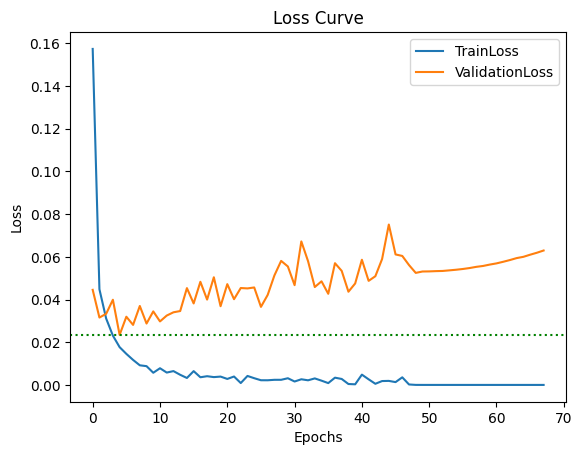

Epoch: 69/100 TrainLoss: 6.513300091168671e-10 ValidationLoss:0.06367392764749974 Best Loss: 0.023452804585666027


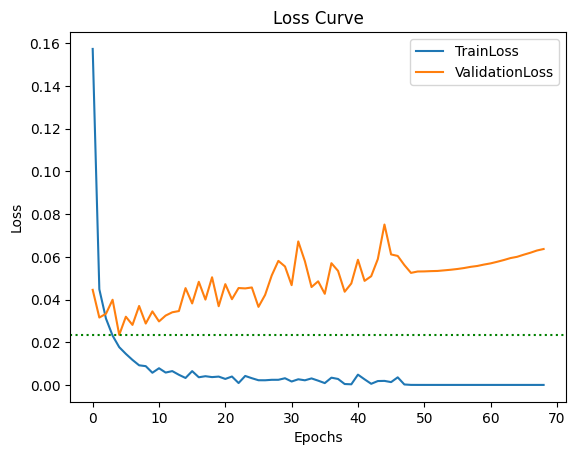

Epoch: 70/100 TrainLoss: 4.1701007016136907e-10 ValidationLoss:0.06452185913973006 Best Loss: 0.023452804585666027


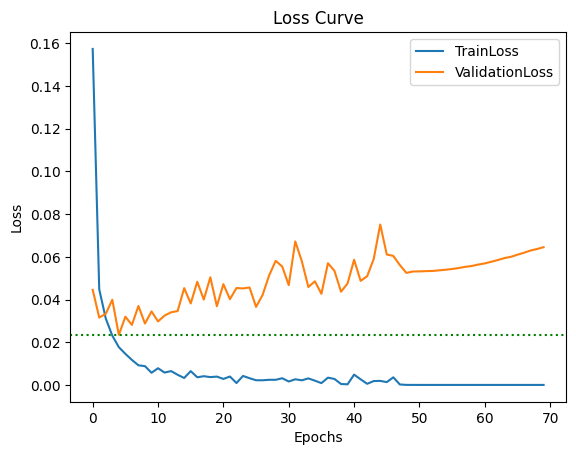

Epoch: 71/100 TrainLoss: 2.482202841753039e-10 ValidationLoss:0.06490788563714152 Best Loss: 0.023452804585666027


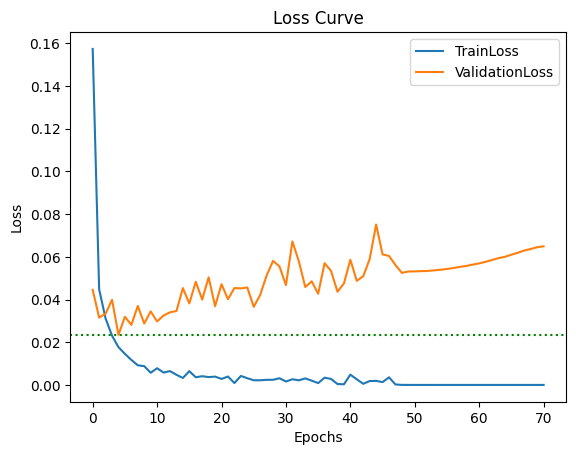

Epoch: 72/100 TrainLoss: 1.5687522129466363e-10 ValidationLoss:0.06507302730867677 Best Loss: 0.023452804585666027


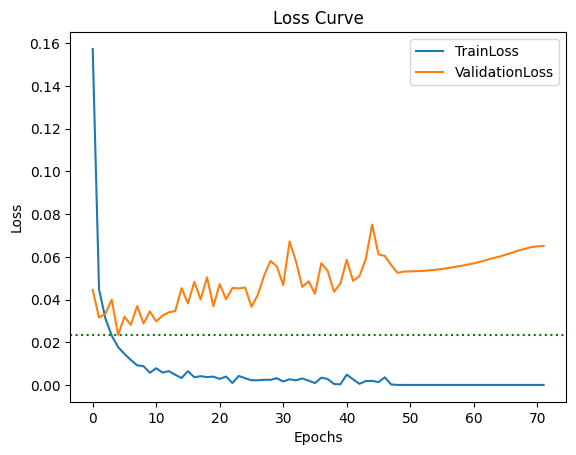

Epoch: 73/100 TrainLoss: 1.0325963928974747e-10 ValidationLoss:0.06500464594426081 Best Loss: 0.023452804585666027


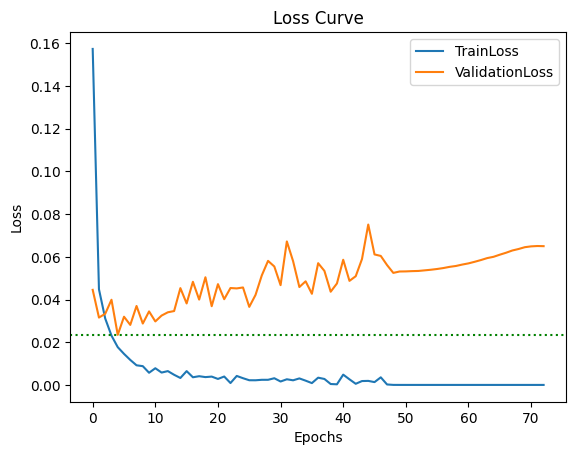

Epoch: 74/100 TrainLoss: 6.553015592844946e-11 ValidationLoss:0.06465265938061045 Best Loss: 0.023452804585666027


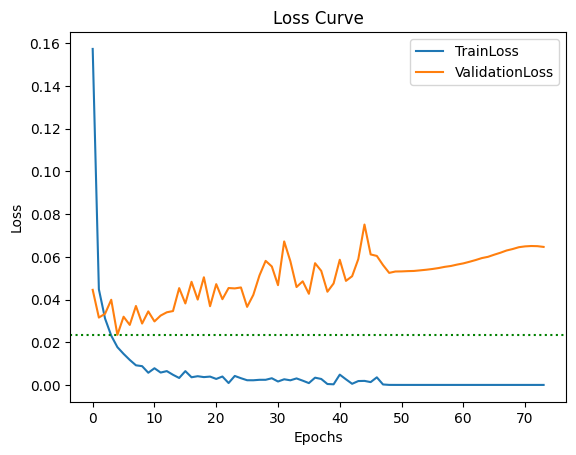

Epoch: 75/100 TrainLoss: 6.950168029345234e-11 ValidationLoss:0.0647893515275766 Best Loss: 0.023452804585666027


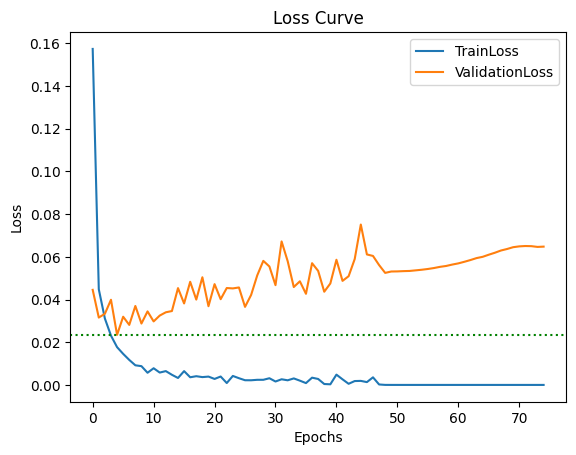

Epoch: 76/100 TrainLoss: 5.361558212327684e-11 ValidationLoss:0.06505367604682456 Best Loss: 0.023452804585666027


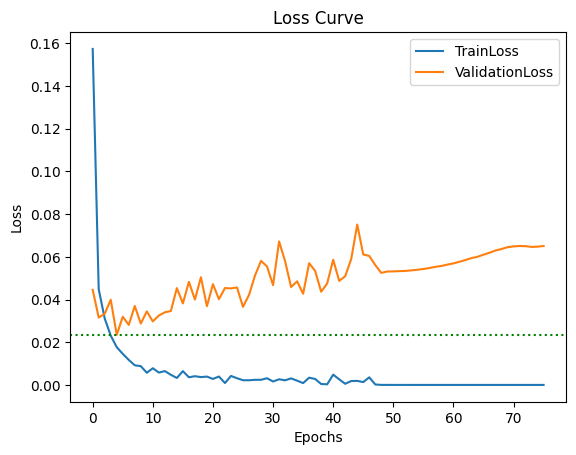

Epoch: 77/100 TrainLoss: 4.765829522069052e-11 ValidationLoss:0.06536822552287064 Best Loss: 0.023452804585666027


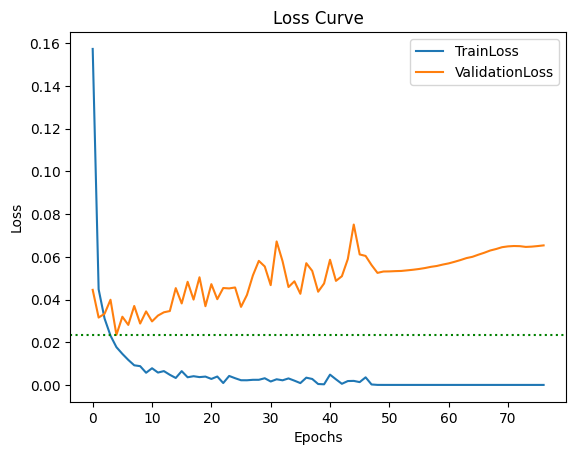

Epoch: 78/100 TrainLoss: 2.3829147373623933e-11 ValidationLoss:0.06501048738809635 Best Loss: 0.023452804585666027


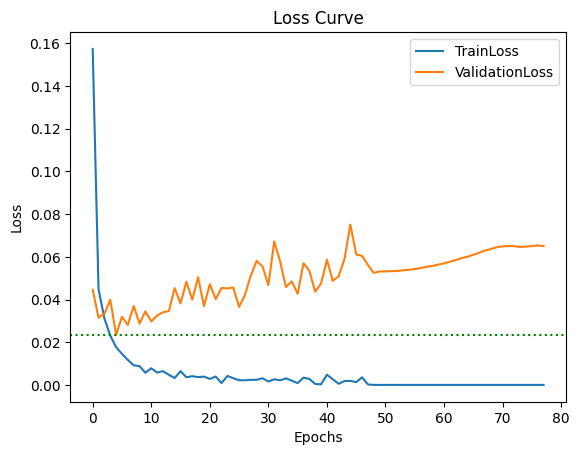

Epoch: 79/100 TrainLoss: 2.780067221206947e-11 ValidationLoss:0.06707656010643567 Best Loss: 0.023452804585666027


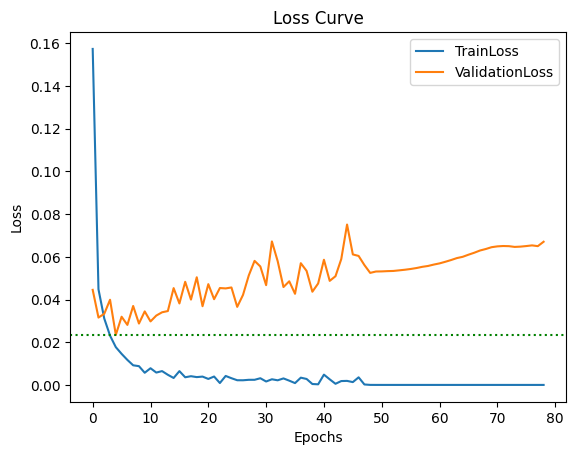

Epoch: 80/100 TrainLoss: 1.9857622535178396e-11 ValidationLoss:0.06798395805123641 Best Loss: 0.023452804585666027


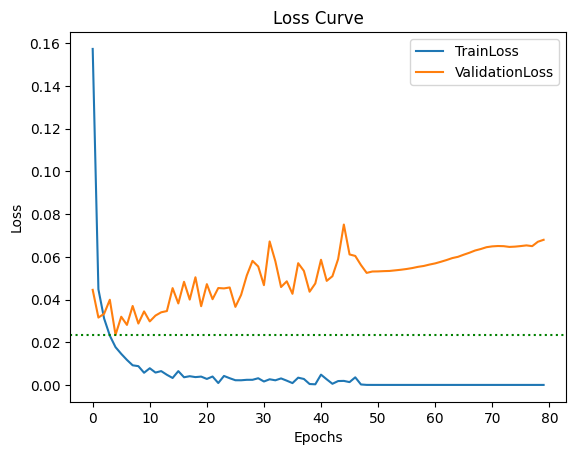

Epoch: 81/100 TrainLoss: 1.5886098170175514e-11 ValidationLoss:0.06873550399941494 Best Loss: 0.023452804585666027


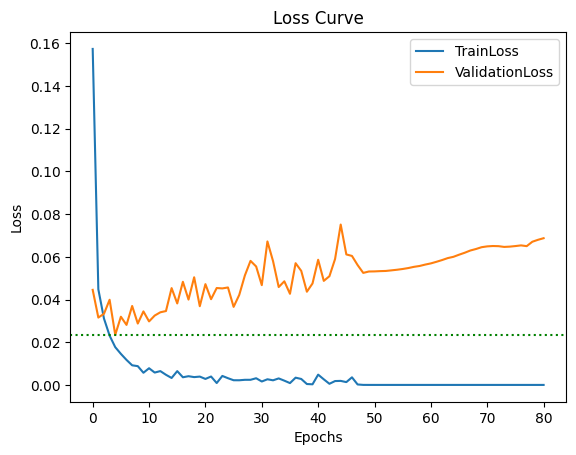

Epoch: 82/100 TrainLoss: 1.985762300862105e-12 ValidationLoss:0.07033839684553847 Best Loss: 0.023452804585666027


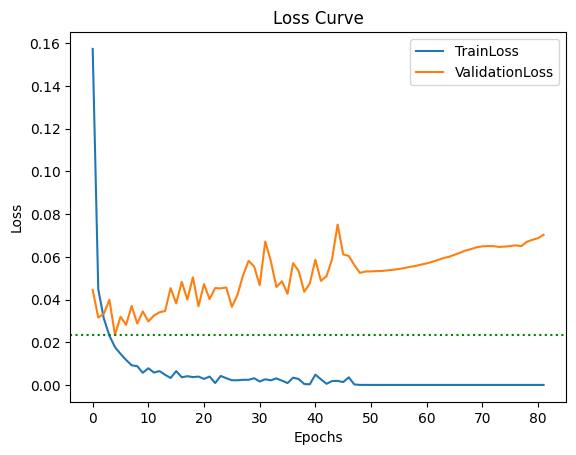

Epoch: 83/100 TrainLoss: 3.97152460172421e-12 ValidationLoss:0.07205056123569732 Best Loss: 0.023452804585666027


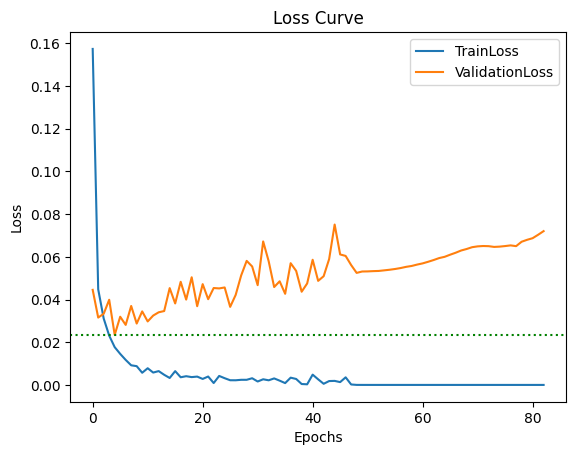

Epoch: 84/100 TrainLoss: 5.957286902586315e-12 ValidationLoss:0.07370824145284899 Best Loss: 0.023452804585666027


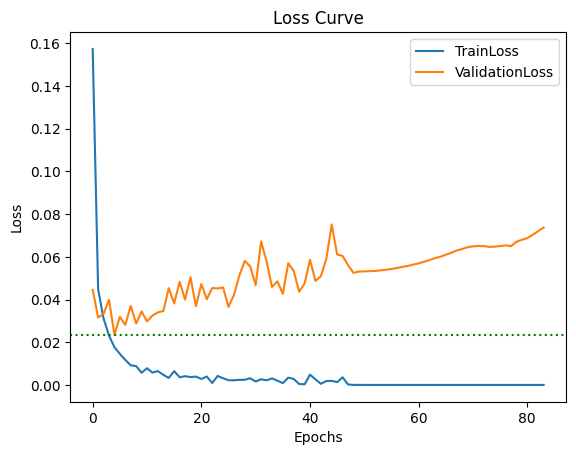

Epoch: 85/100 TrainLoss: 7.943048966727092e-12 ValidationLoss:0.07418210903648202 Best Loss: 0.023452804585666027


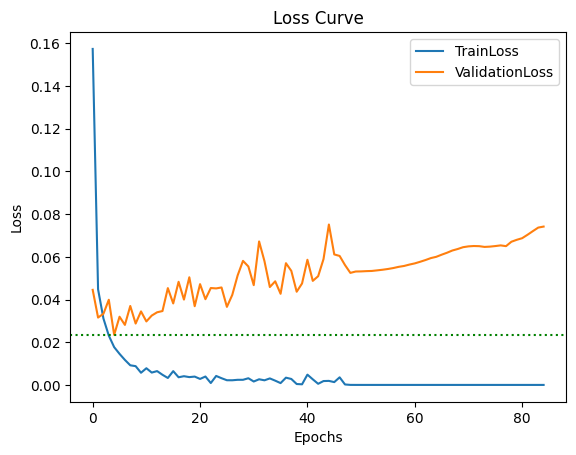

Epoch: 86/100 TrainLoss: 1.985762300862105e-12 ValidationLoss:0.07739773581734778 Best Loss: 0.023452804585666027


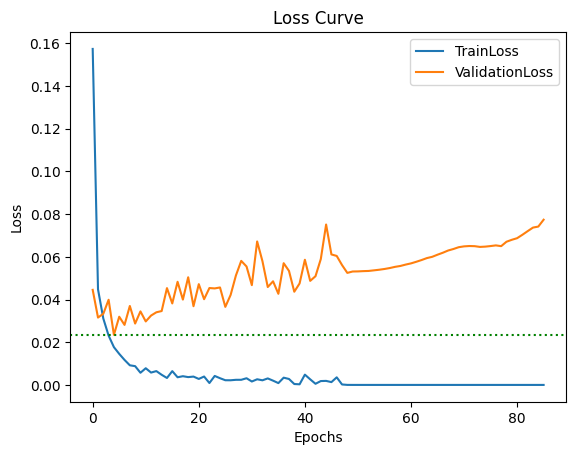

Epoch: 87/100 TrainLoss: 5.957286902586315e-12 ValidationLoss:0.08078576729640374 Best Loss: 0.023452804585666027


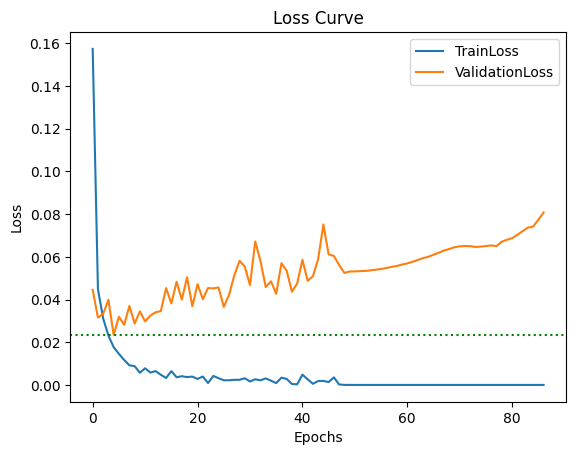

Epoch: 88/100 TrainLoss: 7.943048966727092e-12 ValidationLoss:0.08198954967193647 Best Loss: 0.023452804585666027


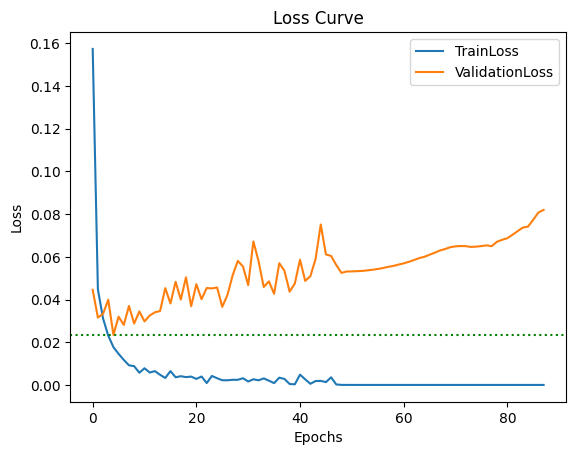

Epoch: 89/100 TrainLoss: 7.94304920344842e-12 ValidationLoss:0.08334367994934266 Best Loss: 0.023452804585666027


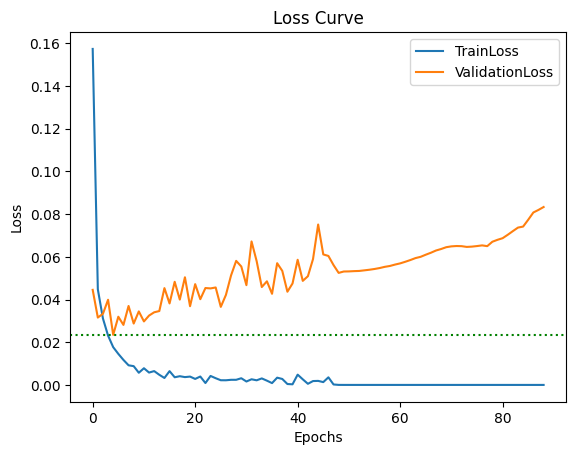

Epoch: 90/100 TrainLoss: 5.957286902586315e-12 ValidationLoss:0.08420543798394439 Best Loss: 0.023452804585666027


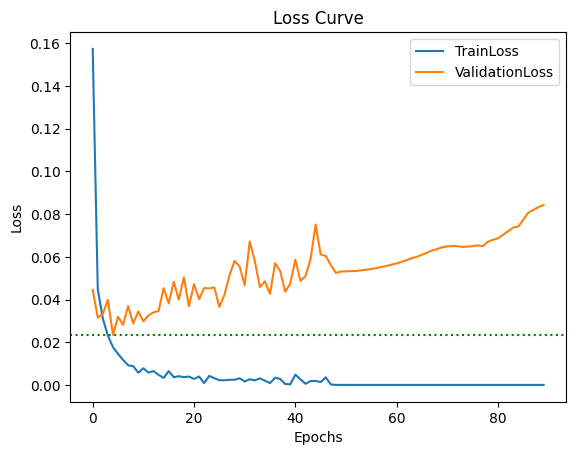

Epoch: 91/100 TrainLoss: 1.985762300862105e-12 ValidationLoss:0.08675436272117668 Best Loss: 0.023452804585666027


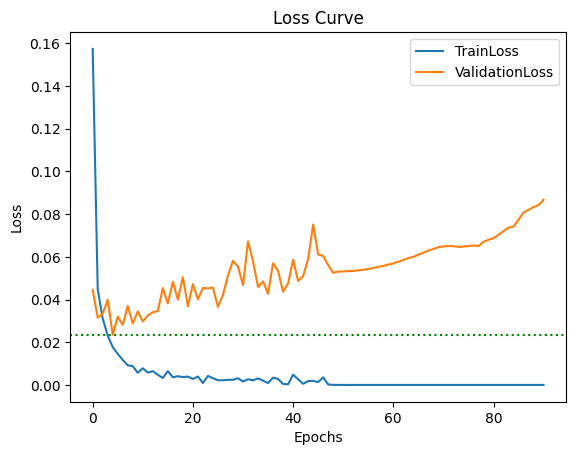

Epoch: 92/100 TrainLoss: 5.957286902586315e-12 ValidationLoss:0.08781212373965232 Best Loss: 0.023452804585666027


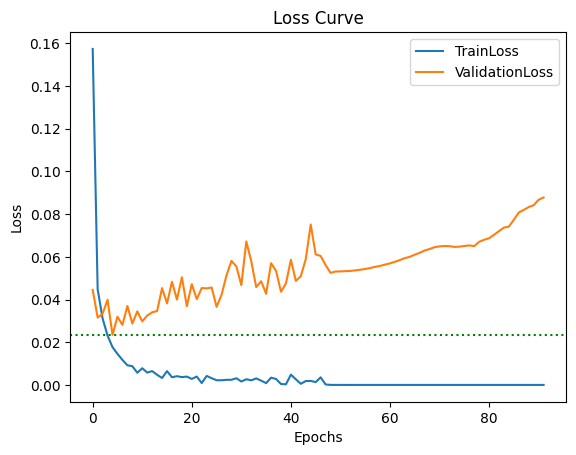

Epoch: 93/100 TrainLoss: 3.97152460172421e-12 ValidationLoss:0.0898619587430776 Best Loss: 0.023452804585666027


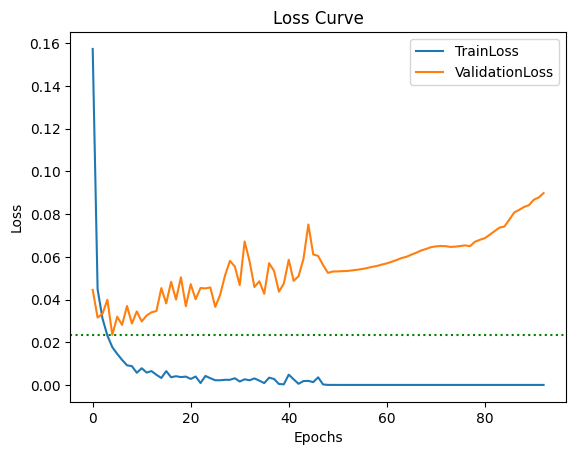

Epoch: 94/100 TrainLoss: 3.97152460172421e-12 ValidationLoss:0.08988278162365738 Best Loss: 0.023452804585666027


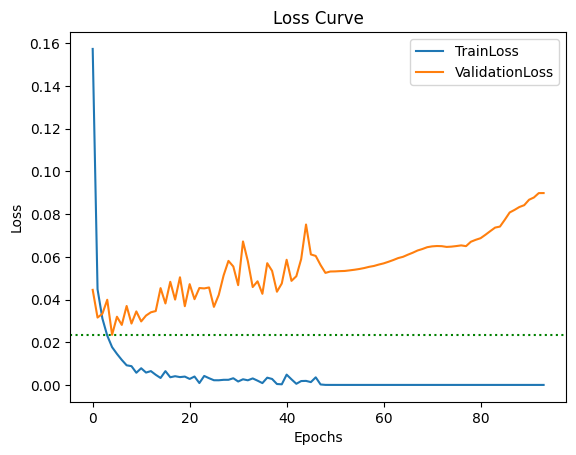

Epoch: 95/100 TrainLoss: 3.97152460172421e-12 ValidationLoss:0.09328291380250772 Best Loss: 0.023452804585666027


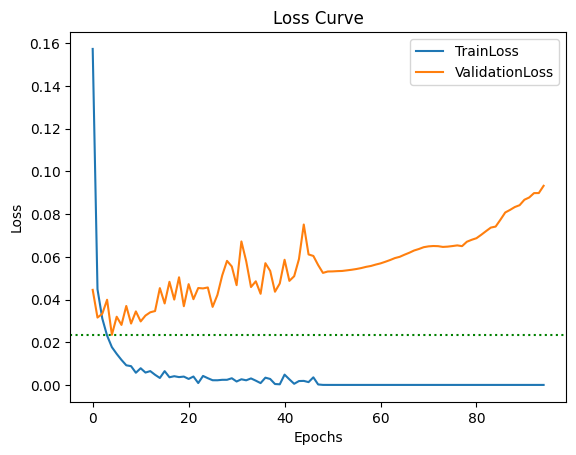

Epoch: 96/100 TrainLoss: 6.751590390767128e-11 ValidationLoss:0.09185070861168469 Best Loss: 0.023452804585666027


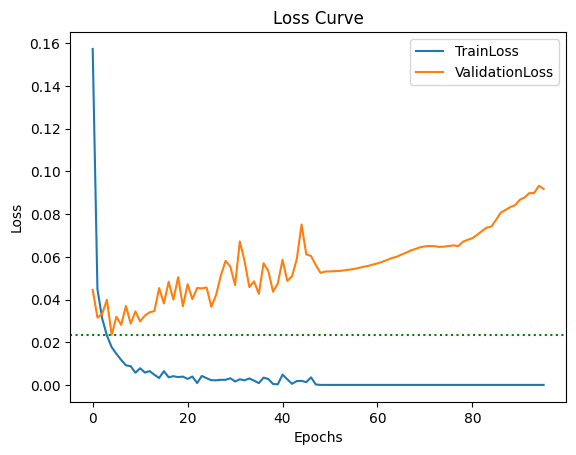

Epoch: 97/100 TrainLoss: 3.971524365002883e-12 ValidationLoss:0.09582265160078818 Best Loss: 0.023452804585666027


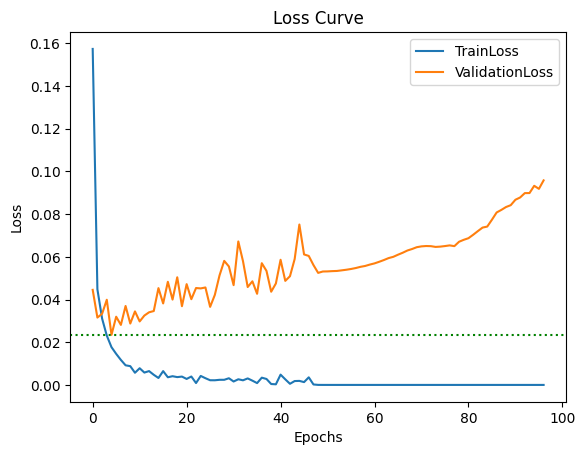

Epoch: 98/100 TrainLoss: 0.0 ValidationLoss:0.09729884863818375 Best Loss: 0.023452804585666027


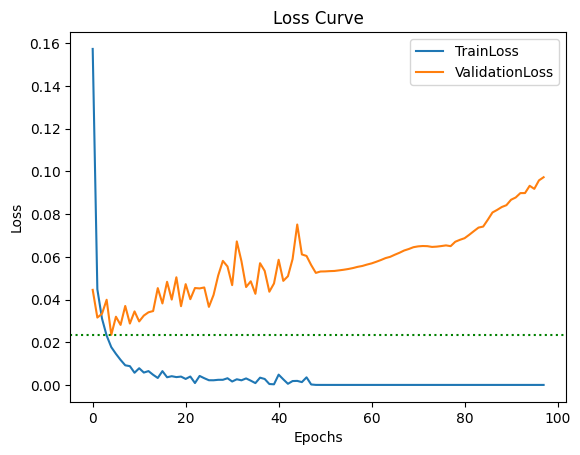

Epoch: 99/100 TrainLoss: 0.0 ValidationLoss:0.09988076377355877 Best Loss: 0.023452804585666027


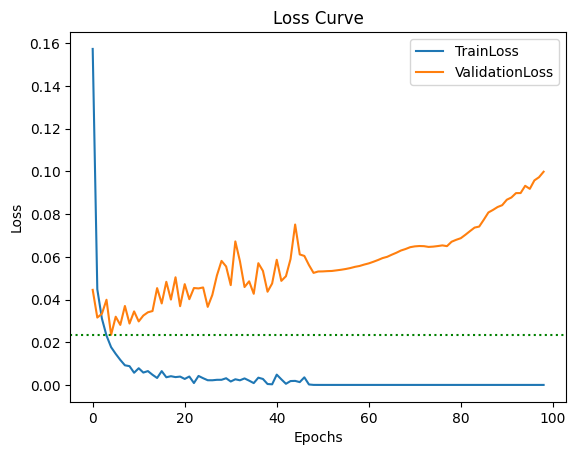

Epoch: 100/100 TrainLoss: 1.985762300862105e-12 ValidationLoss:0.09998731595559918 Best Loss: 0.023452804585666027


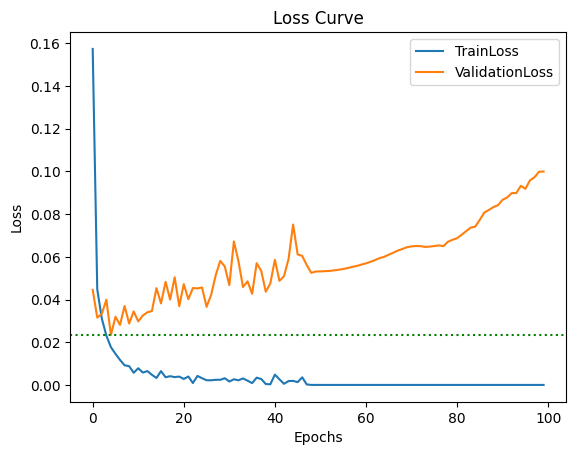

<All keys matched successfully>

In [9]:
losses=[]
vallos=[]
bestLoss = 100
for epoch in range(epochs):
  epochLoss=0
  valLosses=0

  for images,labels in testLoader:
    images = images.to(device)
    labels = labels.to(device)

    predict = model(images)
    loss_val = loss(predict,labels)
    valLosses += loss_val.item()

  for images,labels in trainLoader:

    images = images.to(device)
    labels = labels.to(device)

    predict = model(images)
    loss_val = loss(predict,labels)

    optimizer.zero_grad()
    loss_val.backward()
    optimizer.step()
    epochLoss+=loss_val.item()



  if valLosses/len(testLoader) < bestLoss:
    bestLoss = valLosses/len(testLoader)
    torch.save(model.state_dict(),"bestModel.pth")

  vallos.append(valLosses/len(testLoader))
  losses.append(epochLoss/len(trainLoader))
  print(f"Epoch: {epoch+1}/{epochs} TrainLoss: {epochLoss/len(trainLoader)} ValidationLoss:{valLosses/len(testLoader)} Best Loss: {bestLoss}")


  plt.plot(losses)
  plt.plot(vallos)

  plt.axhline(y=bestLoss, color='green', linestyle=':', label='Target Loss')

  plt.legend(["TrainLoss","ValidationLoss"])
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.show()

model.load_state_dict(torch.load("bestModel.pth"))

In [10]:
import matplotlib.pyplot as plt
import torch

def test_and_visualize(model, test_loader, device, num_images=6):
    # 1. Set model to evaluation mode (critical for consistent testing)
    model.eval()

    # 2. Grab a single batch of test data using an iterator
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    # 3. Move data to GPU/CPU
    images = images.to(device)
    labels = labels.to(device)

    # 4. Turn off gradient tracking (saves memory and speeds up testing)
    with torch.no_grad():
        outputs = model(images)

        # outputs shape is [batch_size, 10].
        # torch.max returns (max_values, max_indices). We want the indices (the predicted class).
        _, predictions = torch.max(outputs, 1)

    # 5. Move tensors back to CPU so Matplotlib can read them
    images = images.cpu()
    predictions = predictions.cpu()
    labels = labels.cpu()

    # 6. Plotting the results
    fig = plt.figure(figsize=(10, 5))
    for i in range(num_images):
        ax = fig.add_subplot(2, int(num_images/2), i+1, xticks=[], yticks=[])

        # PyTorch images are [1, 28, 28]. Matplotlib needs [28, 28].
        # .squeeze() removes that dimension of 1.
        ax.imshow(images[i].squeeze(), cmap='gray')

        # Set text color to green if correct, red if wrong
        color = 'green' if predictions[i] == labels[i] else 'red'
        ax.set_title(f"Pred: {predictions[i].item()}\nTrue: {labels[i].item()}", color=color)

    plt.tight_layout()
    plt.show()

# How to call it after your training loop finishes:
# test_and_visualize(model, testLoader, device, num_images=6)

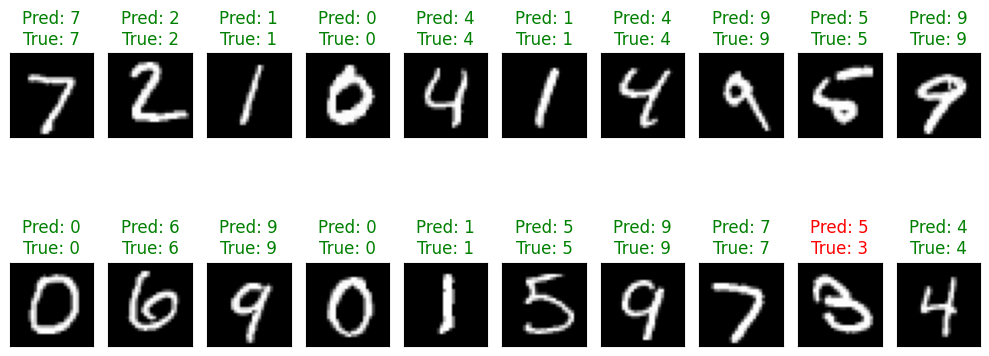

In [11]:
test_and_visualize(model, testLoader, device, num_images=20)